In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [151]:
ipl2020=pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')
ipl2021=pd.read_csv('/content/IPL Ball-by-Ball Dataset 2021.csv')

In [ ]:
ipl2020.head()

In [ ]:
ipl2021.head()

In [152]:
matchdata = pd.concat(
    map(pd.read_csv, ['/content/IPL Ball-by-Ball 2008-2020.csv', '/content/IPL Ball-by-Ball Dataset 2021.csv']))

In [153]:
match_data = pd.read_csv(r'/content/IPL Matches 2008-2020.csv')

In [154]:
match_data["season"] = pd.to_datetime(match_data["date"]).dt.year

In [155]:
matchdata = matchdata.merge(match_data[["id", "season"]], on="id", how="inner")

In [ ]:
matchdata.head()

In [ ]:
matchdata.info()

# Aggregated Batsman Data with Match Id

In [156]:
        batsmen_score = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs"})
        batsmen_scores_30 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=30).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_30"})
        batsmen_scores_50 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=50).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_50"})
        batsmen_scores_100 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())>=100).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_100"})
        batsmen_scores_0 = pd.DataFrame(((matchdata.groupby(['id', 'batsman'])['batsman_runs'].sum())==0).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_0"})
        batsmen_ball_faced = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['over'].count()).\
            rename(columns={"over": "total_balls_faced"})
        batsmen_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'batsman'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_faced"})
        batsmen_scores6 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 6].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_6"})
        batsmen_scores4 = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 4].groupby(['id', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_4"})
        batsmen_position = pd.DataFrame(matchdata.groupby(['id', 'batsman'])['is_wicket'].min())
       
        
        df_list = [batsmen_score, batsmen_ball_faced, batsmen_ball_faced_legal, batsmen_scores6, batsmen_scores4, batsmen_position,batsmen_scores_30,batsmen_scores_50,batsmen_scores_100,batsmen_scores_0]
        batsmen_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        batsmen_summary = pd.merge(batsmen_summary, matchdata[['id', 'batsman', 'inning', 'batting_team', 'bowling_team']].
                                   drop_duplicates(), on=['id', 'batsman'], how='left')
        batsmen_summary.rename(columns={'inning': 'batsmen_innings', 'batsman': 'playername', 'batting_team': 'Playing Team',
                                        'bowling_team': 'Opponent Team'}, inplace=True)
       

In [ ]:
batsmen_summary

# Bowler Data Aggregated with Match Id

In [157]:
        bowler_wickets = pd.DataFrame(matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count()).\
            rename(columns={"is_wicket": "total_wickets"})
        bowler_overs_bow = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['over'].count()).\
            rename(columns={"over": "total_balls_bowled"})
        bowler_ball_faced_legal = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['id', 'bowler'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_bowled"})
        # calculating the number of maiden overs bowled in a match
        bowler_runs_given = pd.DataFrame(matchdata.groupby(['id', 'bowler'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs_given"})
        bowler_wickets_3 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==3).astype(int).\
            rename(columns={"is_wicket": "total_wickets_3"})
        bowler_wickets_4 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==4).astype(int).\
            rename(columns={"is_wicket": "total_wickets_4"})
        bowler_wickets_5 = pd.DataFrame((matchdata[((matchdata['is_wicket'] == 1) & (~matchdata['dismissal_kind'].isin(['run out','retired hurt'])))].
                                      groupby(['id', 'bowler'])['is_wicket'].count())==5).astype(int).\
            rename(columns={"is_wicket": "total_wickets_5"})
        bowler_maiden = pd.DataFrame(matchdata.groupby(['id', 'bowler', 'over'])['total_runs'].sum()).reset_index()
        bowler_maiden['maiden_overs'] = np.where(bowler_maiden['total_runs'] == 0, 1, 0)
        bowler_maiden = bowler_maiden.groupby(['id', 'bowler'])['maiden_overs'].sum()
        
        #legbyes to be considered
        
        df_list = [bowler_wickets, bowler_overs_bow, bowler_ball_faced_legal, bowler_runs_given,bowler_wickets_3,bowler_wickets_4,bowler_wickets_5,bowler_maiden]
        bowler_summary = pd.concat(df_list, join='outer', axis=1).fillna(np.nan).reset_index()
        # adding additional columns just in case we need for modeling
        bowler_summary = pd.merge(bowler_summary, matchdata[['id', 'bowler', 'inning', 'batting_team', 'bowling_team']].drop_duplicates(), on=['id', 'bowler'], how='left')
        bowler_summary.rename(columns={'inning': 'bowlers_innings', 'bowler': 'playername', 'batting_team': 'Playing team',
                                       'bowling_team': 'Opponent Team'}, inplace=True)
        bowler_summary['economy_rate'] = (bowler_summary['total_runs_given'] * 6) / bowler_summary['total_legal_balls_bowled']
        bowler_summary['eco less than 5'] = (bowler_summary['economy_rate']<=5).astype(int)
        bowler_summary['eco 5-5.99'] = ((bowler_summary['economy_rate']<6)&(bowler_summary['economy_rate']>=5)).astype(int)
        bowler_summary['eco 6-7'] = ((bowler_summary['economy_rate']>=6)&(bowler_summary['economy_rate']<7)).astype(int)
        bowler_summary['eco 7-10'] = ((bowler_summary['economy_rate']>=7)&(bowler_summary['economy_rate']<10)).astype(int)
        bowler_summary['eco 11-12'] = ((bowler_summary['economy_rate']>=11)&(bowler_summary['economy_rate']<12)).astype(int)
        bowler_summary['eco greater than 12'] = (bowler_summary['economy_rate']>12).astype(int)
        
        
        

In [ ]:
bowler_summary

In [158]:
fielder_data = pd.DataFrame(matchdata[((matchdata['is_wicket'] == 1) & (matchdata['dismissal_kind'].isin(['caught','caught and bowled','run out','stumped'])))].
                                      groupby(['id','fielder','dismissal_kind'])['is_wicket'].count()).\
            rename(columns={"is_wicket": "Fielding_stats"})

# Batsman,Bowler Merged Statistics

In [159]:
  ipl_merged_scorecard = pd.merge(batsmen_summary, bowler_summary, on=['id', 'playername'], how='outer')

In [ ]:
#for col in list_of_cols:
  #ipl_merged_scorecard.loc[ ipl_merged_scorecard[col].isnull() , col ] = 0
  #ipl_merged_scorecard[col].fillna(0, inplace=True)
#ipl_merged_scorecard.isnull().sum()

In [ ]:
ipl_merged_scorecard

# Batsman, Bowler, All Rounder Classification

In [160]:
        MINAVGBALLSFACED = 8
        MINAVGBOWLSBOWLED = 6
        player_avg = ipl_merged_scorecard[['playername', 'total_balls_faced', 'total_balls_bowled']].fillna(0)
        player_avg = pd.DataFrame(player_avg.groupby('playername')[['total_balls_faced', 'total_balls_bowled']].mean())
        conditions = [((player_avg['total_balls_faced'] >= MINAVGBALLSFACED) & (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)),
                      (player_avg['total_balls_bowled'] >= MINAVGBOWLSBOWLED)]
        choices = ['AllRounder', 'Bowler']
        player_avg['playing_role'] = np.select(conditions, choices, default='Batsmen')
        player_avg = player_avg.reset_index()

In [102]:
player_avg

,playername,total_balls_faced,total_balls_bowled,playing_role
0,A Ashish Reddy,7.000000,9.642857,Bowler
1,A Chandila,0.583333,19.500000,Bowler
2,A Chopra,12.500000,0.000000,Batsmen
3,A Choudhary,4.000000,21.600000,Bowler
4,A Dananjaya,5.000000,25.000000,Bowler
...,...,...,...,...
575,YV Takawale,18.300000,0.000000,Batsmen
576,Yashpal Singh,16.750000,0.000000,Batsmen
577,Younis Khan,7.000000,0.000000,Batsmen
578,Yuvraj Singh,17.093023,6.837209,AllRounder


In [45]:
#this is showing NAN values. if we use inner join then it is coming okay but we need to sort them id basis or something
#ipl_merged_scorecard.merge(player_avg[["playername","playing_role"]], how="outer",left_index=True,right_index=True)

,id,playername_x,total_runs,total_balls_faced,total_legal_balls_faced,run_6,run_4,is_wicket,total_runs_30,total_runs_50,...,Opponent Team_y,economy_rate,eco less than 5,eco 5-5.99,eco 6-7,eco 7-10,eco 11-12,eco greater than 12,playername_y,playing_role
0,335982,AA Noffke,9.0,12.0,11.0,NaN,1.0,0.0,0.0,0.0,...,Royal Challengers Bangalore,8.750000,0.0,0.0,0.0,1.0,0.0,0.0,A Ashish Reddy,Bowler
1,335982,B Akhil,0.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Chandila,Bowler
2,335982,BB McCullum,158.0,77.0,73.0,13.0,10.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Chopra,Batsmen
3,335982,CL White,6.0,10.0,8.0,NaN,NaN,0.0,0.0,0.0,...,Royal Challengers Bangalore,22.000000,0.0,0.0,0.0,0.0,0.0,1.0,A Choudhary,Bowler
4,335982,DJ Hussey,12.0,12.0,12.0,NaN,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Dananjaya,Bowler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17146,1237181,K Rabada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Delhi Capitals,10.666667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
17147,1237181,NM Coulter-Nile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Mumbai Indians,7.000000,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
17148,1237181,P Dubey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Delhi Capitals,9.666667,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
17149,1237181,R Ashwin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Delhi Capitals,7.000000,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [ ]:
ipl_merged_scorecard

In [17]:
#ipl_merged_scorecard =ipl_merged_scorecard.set_index("playername")
#ipl_merged_scorecard.drop_duplicates(inplace=True)
#player_avg = player_avg.set_index("playername")
#ipl_merged_scorecard  = ipl_merged_scorecard.join(player_avg,how='outer')

ValueError: ignored

In [ ]:
ipl_merged_scorecard

In [161]:
pointsconfig = {
        'total_runs': 1,
        'run_6': 2,
        'run_4': 1,
        '>=30':4,
        '>=50': 8,
        '>=100': 16,
        'duck': -2,
        'total_wickets': 25,
        '<=3W':4,
        '>=4W': 8,
        '>=5W': 16,
        'maiden_overs': 8,
        '<=5E': 6,
        '<6E': 4,
        '<7E': 2,
        '>10E': -2,
        '>11E': -4,
        '>12E': -6
    }

In [162]:
        ipl_merged_scorecard['total_runs_points'] = ipl_merged_scorecard['total_runs'] * pointsconfig['total_runs']
        ipl_merged_scorecard['run_6_points'] = pointsconfig['run_6'] *  ipl_merged_scorecard['run_6']
        ipl_merged_scorecard['run_4_points'] = pointsconfig['run_4'] *  ipl_merged_scorecard['run_4']
        ipl_merged_scorecard['30_Run_Points'] = pointsconfig['>=30'] *  ipl_merged_scorecard['total_runs_30']
        ipl_merged_scorecard['50_Run_Points'] = pointsconfig['>=50'] *  ipl_merged_scorecard['total_runs_50']
        ipl_merged_scorecard['100_Run_Points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_runs_100']
        ipl_merged_scorecard['duck_Points'] = pointsconfig['duck'] *  ipl_merged_scorecard['total_runs_0']
        ipl_merged_scorecard['total_bat_points'] = np.nan
        ipl_merged_scorecard['total_bat_points'] = ipl_merged_scorecard['total_runs_points'].add(ipl_merged_scorecard['run_6_points'], fill_value=0). \
            add(ipl_merged_scorecard['run_4_points'], fill_value=0).add(ipl_merged_scorecard['30_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['50_Run_Points'], fill_value=0).add(ipl_merged_scorecard['100_Run_Points'], fill_value=0).\
            add(ipl_merged_scorecard['duck_Points'], fill_value=0)
        ipl_merged_scorecard['total_bat_points'] = np.where(ipl_merged_scorecard['total_balls_faced'] >= 1, ipl_merged_scorecard['total_bat_points'], np.nan)

In [163]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                12162 non-null  float64
 3   total_balls_faced         12162 non-null  float64
 4   total_legal_balls_faced   12111 non-null  float64
 5   run_6                     4530 non-null   float64
 6   run_4                     7451 non-null   float64
 7   is_wicket                 12162 non-null  float64
 8   total_runs_30             12162 non-null  float64
 9   total_runs_50             12162 non-null  float64
 10  total_runs_100            12162 non-null  float64
 11  total_runs_0              12162 non-null  float64
 12  batsmen_innings           12162 non-null  float64
 13  Playing Team              12162 non-null  object 
 14  Oppone

In [164]:
        ipl_merged_scorecard['total_wicket_points'] = ipl_merged_scorecard['total_wickets'] * pointsconfig['total_wickets']
        ipl_merged_scorecard['<=5E_points'] = pointsconfig['<=5E'] *  ipl_merged_scorecard['eco less than 5']
        ipl_merged_scorecard['<6E_points'] = pointsconfig['<6E'] *  ipl_merged_scorecard['eco 5-5.99']
        ipl_merged_scorecard['<7E_points'] = pointsconfig['<7E'] *  ipl_merged_scorecard['eco 6-7']
        ipl_merged_scorecard['>10E_points'] = pointsconfig['>10E'] *  ipl_merged_scorecard['eco 7-10']
        ipl_merged_scorecard['>11E_points'] = pointsconfig['>11E'] *  ipl_merged_scorecard['eco 11-12']
        ipl_merged_scorecard['>12E_points'] = pointsconfig['>12E'] *  ipl_merged_scorecard['eco greater than 12']
        ipl_merged_scorecard['3W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_3']
        ipl_merged_scorecard['4W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_4']
        ipl_merged_scorecard['5W_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['total_wickets_5']
        ipl_merged_scorecard['maiden_overs_points'] = pointsconfig['>=100'] *  ipl_merged_scorecard['maiden_overs']
        ipl_merged_scorecard['total_bowl_points'] = np.nan
        ipl_merged_scorecard['total_bowl_points'] = ipl_merged_scorecard['total_wicket_points'].add(ipl_merged_scorecard['<=5E_points'], fill_value=0). \
            add(ipl_merged_scorecard['<6E_points'], fill_value=0).add(ipl_merged_scorecard['<7E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>10E_points'], fill_value=0).add(ipl_merged_scorecard['>11E_points'], fill_value=0).\
            add(ipl_merged_scorecard['>12E_points'], fill_value=0).add(ipl_merged_scorecard['3W_points'], fill_value=0).\
            add(ipl_merged_scorecard['4W_points'], fill_value=0).add(ipl_merged_scorecard['5W_points'], fill_value=0).\
            add(ipl_merged_scorecard['maiden_overs_points'], fill_value=0)
        ipl_merged_scorecard['total_bowl_points'] = np.where(ipl_merged_scorecard['total_balls_bowled'] >= 1, ipl_merged_scorecard['total_bowl_points'], np.nan)

In [ ]:
ipl_merged_scorecard

In [166]:
ipl_merged_scorecard['total_points'] = ipl_merged_scorecard['total_bat_points'].add(ipl_merged_scorecard['total_bowl_points'], fill_value=0)

In [ ]:
ipl_merged_scorecard

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [171]:
ipl_merged_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17151 entries, 0 to 17150
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        17151 non-null  int64  
 1   playername                17151 non-null  object 
 2   total_runs                12162 non-null  float64
 3   total_balls_faced         12162 non-null  float64
 4   total_legal_balls_faced   12111 non-null  float64
 5   run_6                     4530 non-null   float64
 6   run_4                     7451 non-null   float64
 7   is_wicket                 12162 non-null  float64
 8   total_runs_30             12162 non-null  float64
 9   total_runs_50             12162 non-null  float64
 10  total_runs_100            12162 non-null  float64
 11  total_runs_0              12162 non-null  float64
 12  batsmen_innings           12162 non-null  float64
 13  Playing Team              12162 non-null  object 
 14  Oppone

In [168]:
encoder=OneHotEncoder(sparse=False)

In [ ]:
#features=encoder.fit_transform(ipl_merged_scorecard[["Test1","Test2","Test2"]])

In [ ]:
ipl_merged_scorecard.info()

In [173]:
non_numerical_cols = []

for col in ipl_merged_scorecard.columns:
    if ipl_merged_scorecard[col].dtype not in ['int64','float64']:
        non_numerical_cols.append(col)

non_numerical_cols

['playername',
 'Playing Team',
 'Opponent Team_x',
 'Playing team',
 'Opponent Team_y']

In [174]:
features=encoder.fit_transform(ipl_merged_scorecard[non_numerical_cols])

In [175]:
encoder.get_feature_names_out()
ipl_merged_scorecard_final=pd.DataFrame(features, columns=encoder.get_feature_names_out())

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
scaler=StandardScaler()

In [180]:
ipl_merged_scorecard_final.shape

(17151, 644)

In [ ]:
features_to_scale=["test1","test2","test3"]
ipl_merged_scorecard_final[features_to_scale]=scaler.fit_transform(ipl_merged_scorecard[features_to_scale])

In [ ]:
for col in ipl_merged_scorecard.columns:
    print(col)

In [181]:
ipl_merged_scorecard.replace([np.inf, -np.inf], np.nan, inplace=True)

In [182]:
ipl_merged_scorecard.fillna(0,inplace=True)

In [ ]:
ipl_merged_scorecard.info()

In [ ]:
ipl_merged_scorecard

In [183]:
X = ipl_merged_scorecard[['total_runs','run_6','run_4','total_runs_30','total_runs_50','total_runs_100','total_runs_30','total_wickets','total_balls_bowled','total_wickets_3','total_wickets_4','total_wickets_5','maiden_overs','economy_rate','eco less than 5','eco 5-5.99','eco 6-7','eco 7-10','eco 11-12','eco greater than 12'  ]]
y = ipl_merged_scorecard['total_points']

In [184]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [185]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [186]:
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

0.9998005906230796

In [ ]:
x_test

In [212]:
y_pred = clf.predict(x_test)

In [131]:
clf.score(x_test,y_test)

0.9997885811711923

In [132]:
ipl_merged_scorecard.to_csv('file1.csv')

In [133]:
test=pd.read_csv(r'/content/file1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
test_pred=clf.predict(test)

In [ ]:
test_pred

In [ ]:
df1 = pd.DataFrame(test_pred, columns =['A'])

In [ ]:
input_df=pd.read_csv(r'C:\Users\Yogesh Arora\inputdf.csv')

In [ ]:
output = pd.DataFrame({'ID': test.ID,
                       'default': test_pred[:,1]})
output.to_csv('./submission.csv', index=False)
output

In [ ]:
df1

# Aggregation through Season 

In [ ]:
        batsmen_score_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum()).\
            rename(columns={"batsman_runs": "total_runs"})
        batsmen_scores_30_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=30).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_30"})
        batsmen_scores_50_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=50).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_50"})
        batsmen_scores_100_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())>=100).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_100"})
        batsmen_scores_0_s = pd.DataFrame(((matchdata.groupby(['season', 'batsman'])['batsman_runs'].sum())==0).astype(int)).\
            rename(columns={"batsman_runs": "total_runs_0"})
        batsmen_ball_faced_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['over'].count()).\
            rename(columns={"over": "total_balls_faced"})
        batsmen_ball_faced_legal_s = pd.DataFrame(matchdata[matchdata['ball'] <=6].groupby(['season', 'batsman'])['ball'].count()).\
            rename(columns={"ball": "total_legal_balls_faced"})
        batsmen_scores6_s = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 6].groupby(['season', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_6"})
        batsmen_scores4_s = pd.DataFrame(matchdata[matchdata['batsman_runs'] == 4].groupby(['season', 'batsman'])['batsman_runs'].count()).\
            rename(columns={"batsman_runs": "run_4"})
        batsmen_position_s = pd.DataFrame(matchdata.groupby(['season', 'batsman'])['is_wicket'].min())
       
        
        df_list_season = [batsmen_score_s, batsmen_ball_faced_s, batsmen_ball_faced_legal_s, batsmen_scores6_s, batsmen_scores4_s, batsmen_position_s,batsmen_scores_30_s,batsmen_scores_50_s,batsmen_scores_100_s,batsmen_scores_0_s]
        batsmen_summary_season = pd.concat(df_list_season, join='outer', axis=1).fillna(np.nan).reset_index()
        batsmen_summary_season = pd.merge(batsmen_summary_season, matchdata[['season', 'batsman', 'inning', 'batting_team', 'bowling_team']].
                                   drop_duplicates(), on=['season', 'batsman'], how='left')
        batsmen_summary_season.rename(columns={'inning': 'batsmen_innings', 'batsman': 'playername', 'batting_team': 'Playing Team',
                                        'bowling_team': 'Opponent Team'}, inplace=True)

In [ ]:
 batsmen_summary_season

In [ ]:
from sklearn import datasets, linear_model, metrics

In [ ]:
boston = datasets.load_boston(return_X_y=False)

In [ ]:
boston.data

In [ ]:
boston_f = pd.Dataframe(boston,)

In [ ]:
X = ipl_merged_scorecard[['total_runs','run_6','run_4','total_runs_30','total_runs_50','total_runs_100','total_runs_30','total_wickets','total_balls_bowled','total_wickets_3','total_wickets_4','total_wickets_5','maiden_overs','economy_rate','eco less than 5','eco 5-5.99','eco 6-7','eco 7-10','eco 11-12','eco greater than 12'  ]]
y = ipl_merged_scorecard['total_points']

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
													random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)


In [ ]:
new1=reg.predict(X_test)

In [ ]:
new1

In [ ]:
reg.score(X_test,y_test)

In [ ]:
df = pd.DataFrame(new1, columns =['A'])

In [ ]:
df

# Evaluation



---




In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print( "R2 Score: ", r2_score(y_test , y_pred) )
print( "MSE: ", mean_squared_error(y_test , y_pred) )
print( "RMSE: ", np.sqrt(mean_squared_error(y_test , y_pred)) )
print( "MAE: ", mean_absolute_error(y_test , y_pred) )

R2 Score:  0.9997938882016846
MSE:  0.2151385146160482
RMSE:  0.46383026487719425
MAE:  0.24708168630601318


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


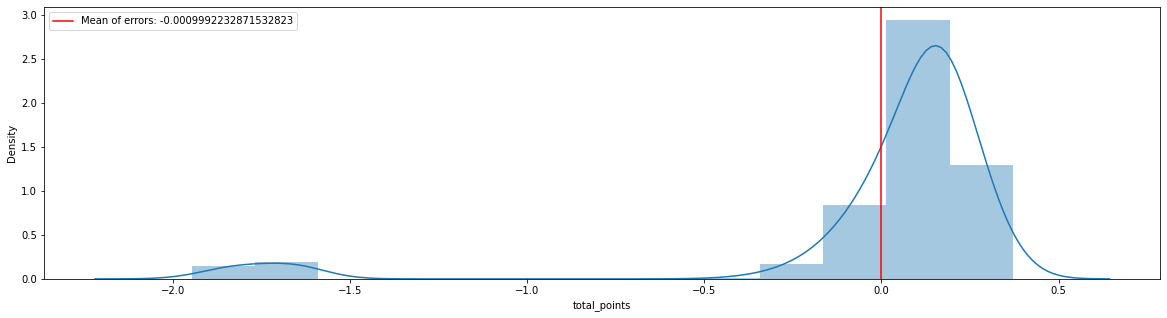

In [218]:
errors = y_test - y_pred

plt.figure(figsize=(20,5))
sns.distplot(errors, bins = "sturges")
plt.axvline(x = errors.mean() , color ="r", label = f"Mean of errors: {errors.mean()}")
plt.legend()
plt.show()

In [226]:
len(errors)

3431

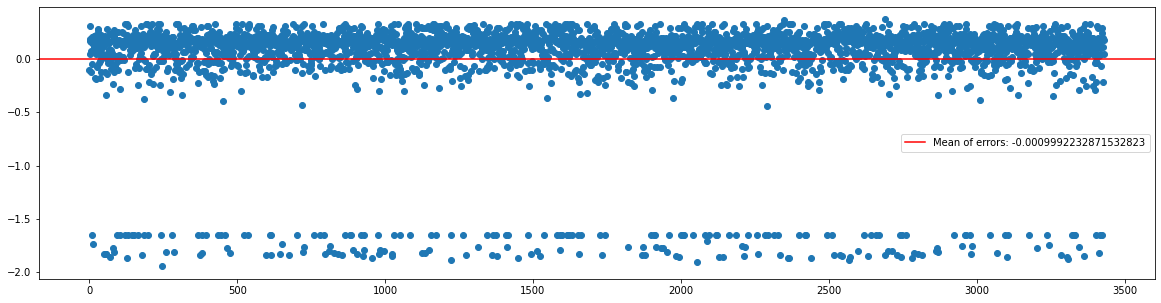

In [228]:
plt.figure(figsize=(20,5))
plt.scatter(range(len(x_test)), errors)
plt.axhline(y = errors.mean() , color ="r", label = f"Mean of errors: {errors.mean()}")
plt.legend()
plt.show()

In [220]:
import statsmodels.api as sm


x_train_2 = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_train_2).fit()
print(ols.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.615e+06
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:24:38   Log-Likelihood:                -8631.3
No. Observations:               13720   AIC:                         1.730e+04
Df Residuals:                   13700   BIC:                         1.745e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3452    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [221]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                feature        VIF
0            total_runs  24.210858
1                 run_6   5.056037
2                 run_4  10.521120
3         total_runs_30        inf
4         total_runs_50   2.421469
5        total_runs_100   1.160263
6         total_runs_30        inf
7         total_wickets   3.983298
8    total_balls_bowled  11.485270
9       total_wickets_3   1.599642
10      total_wickets_4   1.292257
11      total_wickets_5   1.072357
12         maiden_overs   1.086385
13         economy_rate  10.210255
14      eco less than 5   1.762666
15           eco 5-5.99   1.478679
16              eco 6-7   1.822131
17             eco 7-10   3.529349
18            eco 11-12   1.527068
19  eco greater than 12   2.544736
